In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.


In [63]:
data=pd.read_excel(r'C:\Users\Anjali\Downloads\iris.xls')

In [64]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
data.shape

(150, 5)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [67]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do necessary pre-processing steps.


In [68]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [69]:
data.SL.median()

5.8

In [70]:
data.SL.fillna(data['SL'].median(),inplace=True)

In [71]:
data.SW.median()

3.0

In [72]:
data.SW.fillna(data['SW'].median(),inplace=True)

In [73]:
data.PL.median()

4.35

In [74]:
data.PL.fillna(data['PL'].median(),inplace=True)

In [75]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# label encoding

In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [77]:
data['Classification']=le.fit_transform(data['Classification'])


In [78]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.3 KB


<AxesSubplot:ylabel='SL'>

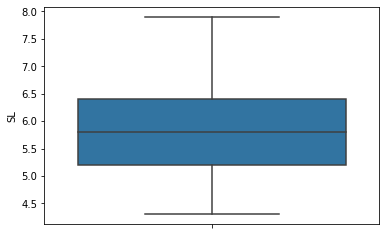

In [80]:
sns.boxplot(y=data.SL)

<AxesSubplot:ylabel='SW'>

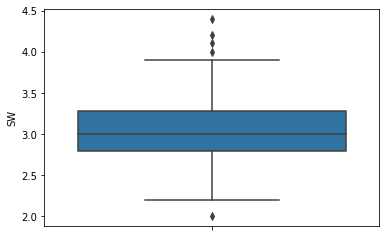

In [24]:
sns.boxplot(y=data.SW)

In [25]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
IQR=Q3-Q1
lowlmt=Q1-1.5*IQR
uplmt=Q3+1.5*IQR

In [26]:
print(lowlmt)
print(uplmt)

2.1249999999999996
3.9250000000000003


In [27]:
outlier = []
for x in data['SW']:
    if (x > uplmt) or (x < lowlmt):
        outlier.append(x)
print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [28]:
index1 = (data['SW']>uplmt)
index1 = data.loc[index1].index

In [29]:
data.loc[list(index1),'SW']=data['SW'].median()

In [30]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


<AxesSubplot:ylabel='SW'>

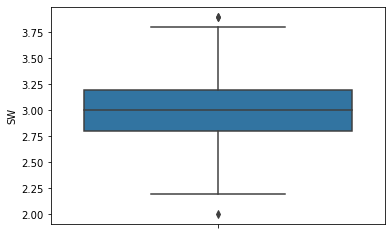

In [31]:
sns.boxplot(y=data.SW)

<AxesSubplot:ylabel='PW'>

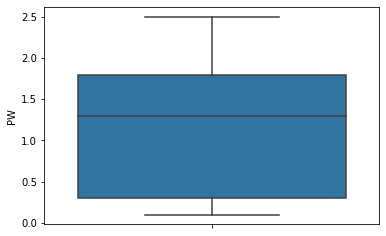

In [32]:
sns.boxplot(y=data.PW)

<AxesSubplot:ylabel='PL'>

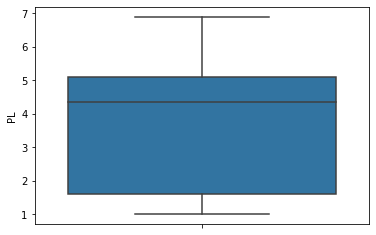

In [35]:
sns.boxplot(y=data.PL)

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [82]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [83]:
X=data.drop(['Classification'],axis=1)
y=data['Classification']

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

# logistic regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [94]:
model=LogisticRegression(solver='liblinear')


In [97]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [96]:
y_pred=model.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [104]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("recall is:",recall_score(y_test,y_pred,average='macro'))
print("precision is:",precision_score(y_test,y_pred,average='macro'))
print("f1 is:",f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9473684210526315
recall is: 0.9523809523809524
precision is: 0.9583333333333334
f1 is: 0.952136752136752


In [105]:

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0 12  2]
 [ 0  0 14]]


# KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [113]:
acc_values

[0.868421052631579,
 0.868421052631579,
 0.8421052631578947,
 0.8947368421052632,
 0.8947368421052632,
 0.868421052631579,
 0.868421052631579,
 0.868421052631579,
 0.868421052631579,
 0.8421052631578947,
 0.868421052631579,
 0.868421052631579]

Text(0, 0.5, 'accuracy')

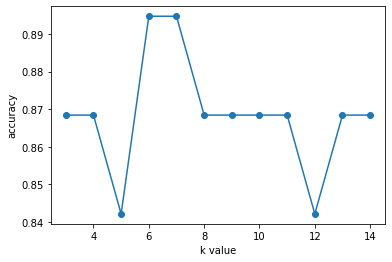

In [114]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("k value")
plt.ylabel('accuracy')

In [126]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
    

In [128]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("recall is:",recall_score(y_test,y_pred,average='macro'))
print("precision is:",precision_score(y_test,y_pred,average='macro'))
print("f1 is:",f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.8421052631578947
recall is: 0.8571428571428572
precision is: 0.8611111111111112
f1 is: 0.8564102564102564


In [129]:
data.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667,1.000000
std,0.808567,0.421995,1.729424,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


standard scaling

In [130]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [131]:
model=LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [132]:
print("accuracy is:",accuracy_score(y_test,y_pred))

accuracy is: 0.9210526315789473


In [133]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 1 11  2]
 [ 0  0 14]]


# random forest

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [143]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("recall is:",recall_score(y_test,y_pred,average='macro'))
print("precision is:",precision_score(y_test,y_pred,average='macro'))
print("f1 is:",f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9210526315789473
recall is: 0.9285714285714285
precision is: 0.9411764705882352
f1 is: 0.927741935483871


In [144]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0 14  0]
 [ 0  3 11]]


# decision tree

In [146]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [148]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("recall is:",recall_score(y_test,y_pred,average='macro'))
print("precision is:",precision_score(y_test,y_pred,average='macro'))
print("f1 is:",f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.8947368421052632
recall is: 0.9047619047619048
precision is: 0.9097222222222222
f1 is: 0.9042735042735043


In [149]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0 13  1]
 [ 0  3 11]]


### svm

In [150]:
from sklearn.svm import SVC

In [152]:
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

In [153]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("recall is:",recall_score(y_test,y_pred,average='macro'))
print("precision is:",precision_score(y_test,y_pred,average='macro'))
print("f1 is:",f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9210526315789473
recall is: 0.9285714285714285
precision is: 0.9411764705882352
f1 is: 0.927741935483871


In [154]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0 14  0]
 [ 0  3 11]]


In [155]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [156]:
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

In [157]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("recall is:",recall_score(y_test,y_pred,average='macro'))
print("precision is:",precision_score(y_test,y_pred,average='macro'))
print("f1 is:",f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9210526315789473
recall is: 0.9285714285714285
precision is: 0.9411764705882352
f1 is: 0.927741935483871


# logistic classification gives best results